# Task:
The task is to develop an approach that given a sample will identify the subthemes along with
their respective sentiments.

# APPROACH:
**Load the Dataset:**
Import the CSV file into a Pandas DataFrame.

**Combine Review Parts:**
Concatenate multiple cells containing parts of the same review into a
single cell for each review.

**Text Preprocessing:**
Convert text to lowercase.
Remove punctuation.
Tokenization using spaCy.
Stop words removal and lemmatization.

Define Possible Subthemes:
Create a list of possible subthemes (e.g., "tyre", "garage", "service", "booking", etc.).

Extract Subthemes:
Identify subthemes present in the processed text using spaCy's lemmatization.

**Perform Sentiment Analysis:**
Analyze the sentiment of each review using VADER which is a pretrained sentiment analyzing tool.

Classify sentiment as "positive", "negative", or "neutral".
Generate Results:
Store the results in a new DataFrame.

**Save Results:**
Export the results to a new CSV file for further use.

# IMPORTING THE NECESSARY LIBRARIES

In [1]:
pip install vaderSentiment #installing vader for sentiment analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for plotting plots
import spacy #for preprocessing(stop words)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer #for sentiment analysis

In [3]:
#dataset is stored in drive so using google drive mount to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NOTE: I have imported datset from drive as it is easier to import huge datasets from drive directly instead of uploading it everytime you run the colab file

SO, UPLOAD THE DATASET IN THE FILES AND THEN RUN THE BELOW SCRIPT BY ADDING YOUR OWN DATASET PATH

# Importing the dataset

In [4]:
#importing the dataset and storing it in data dataframe
data = pd.read_csv('/content/drive/MyDrive/Evaluation-dataset.csv')

# Basic EDA

In [5]:
#displaying the first 5 entries
data.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#basic info about data
data.describe()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,10131,8128,4238,1538,445,128,36,13,8,4,1,1,1,1,1
unique,10127,84,65,52,50,37,20,9,6,2,1,1,1,1,1
top,Easy to use website,value for money positive,value for money positive,value for money positive,value for money positive,garage service positive,value for money positive,booking confusion negative,value for money positive,garage service positive,incorrect tyres sent positive,call wait time positive,refund positive,no stock positive,balancing positive
freq,2,3334,1113,253,58,12,7,2,3,2,1,1,1,1,1


In [7]:
#getting the datatypes(its going to be all object)
data.dtypes

Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.    object
garage service positive                                                                                                                                                                                       object
ease of booking positive                                                                                                                                                                                      object
Unnamed: 3                                                                                                                                                                                                    object
Unnamed: 4                                                                                                                                          

In [9]:
data

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10129,Excellent service from point of order to fitti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#getting the data dimensions
data.shape

(10131, 15)

# Data Preprocessing

In [16]:
#importing spacy stop words removal module
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [17]:
#creating a function to combine the reviews
def combine_review_parts(row):
    review_parts = row.dropna().astype(str)
    combined_review = ' '.join(review_parts)
    return combined_review

data['combined_review'] = data.apply(combine_review_parts, axis=1)

In [18]:
data

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,combined_review
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Easy Tyre Selection Process, Competitive Prici..."
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very easy to use and good value for money. val...
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Really easy and convenient to arrange ease of ...
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It was so easy to select tyre sizes and arrang...
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,service was excellent. Only slight downside wa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10126,"I ordered the wrong tyres, however [REDACTED] ...",refund positive,delivery punctuality positive,refund timescale positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I ordered the wrong tyres, however [REDACTED] ..."
10127,"Good experience, first time I have used [REDAC...",length of fitting positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Good experience, first time I have used [REDAC..."
10128,"I ordered the tyre I needed on line, booked a ...",location positive,delivery punctuality positive,length of fitting positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I ordered the tyre I needed on line, booked a ..."
10129,Excellent service from point of order to fitti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Excellent service from point of order to fitti...


In [19]:
data.head()

,"Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.",garage service positive,ease of booking positive,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,combined_review
0,"Easy Tyre Selection Process, Competitive Prici...",garage service positive,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Easy Tyre Selection Process, Competitive Prici..."
1,Very easy to use and good value for money.,value for money positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very easy to use and good value for money. val...
2,Really easy and convenient to arrange,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Really easy and convenient to arrange ease of ...
3,It was so easy to select tyre sizes and arrang...,location positive,value for money positive,ease of booking positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It was so easy to select tyre sizes and arrang...
4,service was excellent. Only slight downside wa...,length of fitting positive,ease of booking positive,ease of booking negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,service was excellent. Only slight downside wa...


In [20]:
data.shape

(10131, 16)

In [21]:
# Initialize spaCy and VADER
nlp = spacy.load("en_core_web_sm")
analyzer = SentimentIntensityAnalyzer()

In [22]:
#defining the possible subthemes
possible_subthemes = ["tyre", "garage", "service", "booking", "wait", "staff", "location", "delivery", "fitting", "punctuality", "quality", "price", "money"]

In [23]:
#function to preprocess the text(review)
#(converting to lowertext, removing punctuations, tokenization, stopwords removal, lemmatization)

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    doc = nlp(text) #using spacy
    # Remove stop words and lemmatize
    tokens = [token.lemma_ for token in doc if token.text not in STOP_WORDS and not token.is_punct]
    return ' '.join(tokens)

#storing the preprocessed reviews
data['processed_review'] = data['combined_review'].apply(preprocess_text)

In [24]:
#functiin to extract the subthemes from the reviews
def extract_subthemes(review):
    doc = nlp(review)
    subthemes = set()
    for token in doc:
        if token.lemma_ in possible_subthemes:
            subthemes.add(token.lemma_)
    return list(subthemes)


In [25]:
#function to analyze the sentiment of the subthemes
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text) #gives a sentiment score(by VADER)
    if sentiment_scores['compound'] >= 0.05:
        return "positive"
    elif sentiment_scores['compound'] <= -0.05:
        return "negative"
    else:
        return "neutral"


# Sentiment analysis and storing results

In [26]:
#Process each review to extract subthemes and analyze sentiments

results = [] #will store the results

for index, row in data.iterrows():
    processed_review = row['processed_review'] #accessing the processed_review to extract subthemes
    combined_review = row['combined_review'] #accessing the combined_review to store it as a review column
    subthemes = extract_subthemes(processed_review) #applying the extract_subthemes function to the processec review to get the subthemes
    for subtheme in subthemes:
        sentiment = analyze_sentiment(processed_review)
        results.append({
            'review_id': index + 1, #id
            'review': combined_review,  #review
            'subtheme': subtheme, #subtheme of review
            'sentiment': sentiment  #sentiment of the subtheme
        })


In [27]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Result Analysis

In [28]:
#displaying the results dataframe
results_df

,review_id,review,subtheme,sentiment
0,1,"Easy Tyre Selection Process, Competitive Prici...",money,positive
1,1,"Easy Tyre Selection Process, Competitive Prici...",tyre,positive
2,1,"Easy Tyre Selection Process, Competitive Prici...",garage,positive
3,1,"Easy Tyre Selection Process, Competitive Prici...",service,positive
4,1,"Easy Tyre Selection Process, Competitive Prici...",fitting,positive
...,...,...,...,...
27179,10129,"I ordered the tyre I needed on line, booked a ...",tyre,positive
27180,10129,"I ordered the tyre I needed on line, booked a ...",garage,positive
27181,10129,"I ordered the tyre I needed on line, booked a ...",delivery,positive
27182,10129,"I ordered the tyre I needed on line, booked a ...",punctuality,positive


In [32]:
#displaying the results_df 1st row
results_df.iloc[0,:]

review_id                                                    1
review       Easy Tyre Selection Process, Competitive Prici...
subtheme                                                 money
sentiment                                             positive
Name: 0, dtype: object

In [33]:
#dimensions of the results_df
results_df.shape

(27184, 4)

In [36]:
#displaying the columns of the results_df
results_df.columns

Index(['review_id', 'review', 'subtheme', 'sentiment'], dtype='object')

In [38]:
#displaying the unique values' count in sentiment column
results_df.sentiment.value_counts()

sentiment
positive    24296
negative     2681
neutral       207
Name: count, dtype: int64

As we can see there are * positive, * negative and * neutral sentiments for subthemes

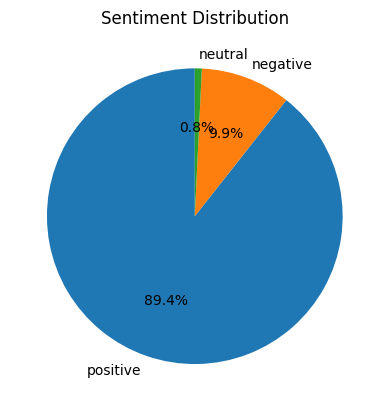

In [50]:
#displaying the count of sentiments(positive, negative, netural) suing a piechart
results_df.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=90)
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

Storing the result in a csv


In [51]:
results_df.to_csv('subtheme_sentiments.csv', index=False)